In [1]:
#Importujemy odpowiednie biblioteki
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from pathlib import Path

np.random.seed(42) #Uczyńmy wyniki notatnika stabilnymi w poszczegolnych przebiegach

#Zdefiniujmy domyslne rozmiary czcionek służace do generowania rysunków
plt.rc('font', size=12)
plt.rc('axes', labelsize=14,titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)

#Zdefiniujmy ustawienie biblioteki Pandas
pd.set_option('display.max_columns', None)

In [2]:
datapath = Path()/ "data"/ "lifesat"# Definiujemy ścieżkę do bieżacego katalogu
#Wczutuje zbiory
oecd_bli = pd.read_csv(datapath / "oecd_bli.csv")
gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv")

In [3]:
oecd_bli

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.40,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.50,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.70,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.00,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,LTU,Lithuania,WL_EWLH,Employees working very long hours,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,0.54,NaN,NaN
2365,COL,Colombia,WL_EWLH,Employees working very long hours,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,32.09,NaN,NaN
2366,LTU,Lithuania,WL_EWLH,Employees working very long hours,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,0.67,NaN,NaN
2367,COL,Colombia,WL_EWLH,Employees working very long hours,L,Value,WMN,Women,PC,Percentage,0,Units,NaN,NaN,19.37,NaN,NaN


In [4]:
gdp_per_capita

,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)"
0,Afghanistan,AFG,2002,1189.784668
1,Afghanistan,AFG,2003,1235.810063
2,Afghanistan,AFG,2004,1200.278013
3,Afghanistan,AFG,2005,1286.793659
4,Afghanistan,AFG,2006,1315.789117
...,...,...,...,...
7104,Zimbabwe,ZWE,2016,3173.610829
7105,Zimbabwe,ZWE,2017,3274.611198
7106,Zimbabwe,ZWE,2018,3341.665418
7107,Zimbabwe,ZWE,2019,3027.656038


In [5]:

#Wstępne przetwarzamy dane PKB per capita tak, żeby
gdp_per_capita_2020 = gdp_per_capita[gdp_per_capita["Year"]==2020]
gdp_per_capita_2020 = gdp_per_capita_2020.rename(
    columns = {
        "GDP per capita, PPP (constant 2017 international $)"
        : "GDP per capita (USD)"
    }
)
gdp_per_capita_2020

,Entity,Code,Year,GDP per capita (USD)
18,Afghanistan,AFG,2020,1978.961579
49,Africa Eastern and Southern,NaN,2020,3387.594670
80,Africa Western and Central,NaN,2020,4003.158913
111,Albania,ALB,2020,13295.410885
142,Algeria,DZA,2020,10681.679297
...,...,...,...,...
6984,Vanuatu,VUT,2020,2762.791388
7015,Vietnam,VNM,2020,8200.331867
7046,World,OWID_WRL,2020,16194.040310
7077,Zambia,ZMB,2020,3270.035112


In [6]:
oecd_bli["Indicator"].value_counts()

Indicator
Student skills                                       200
Self-reported health                                 182
Quality of support network                           168
Life satisfaction                                    168
Labour market insecurity                             162
Homicide rate                                        123
Feeling safe walking alone at night                  123
Life expectancy                                      123
Water quality                                        123
Employment rate                                      123
Years in education                                   120
Educational attainment                               120
Long-term unemployment rate                          117
Employees working very long hours                    117
Time devoted to leisure and personal care             69
Air pollution                                         41
Voter turnout                                         41
Stakeholder engagemen

In [7]:
#Tabela przestawna
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(
    index="Country",
    columns="Indicator",
    values = "Value"
)
oecd_bli

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,Labour market insecurity,Life expectancy,Life satisfaction,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,5.4,82.5,7.3,1.31,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,3.5,81.7,7.1,1.84,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,3.7,81.5,6.9,3.54,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,NaN,74.8,6.4,NaN,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,6.0,81.9,7.4,0.77,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3
Chile,16.0,9.4,65.0,9.72,63.0,47.9,4.2,NaN,100967.0,18.0,8.7,79.9,6.5,NaN,25879.0,85.0,1.2,57.0,1.3,443.0,NaN,47.0,71.0,17.5
Colombia,10.0,23.9,54.0,26.56,67.0,44.4,24.5,NaN,NaN,17.0,NaN,76.2,6.3,0.79,NaN,89.0,1.2,NaN,1.4,410.0,NaN,53.0,75.0,14.1
Czech Republic,20.0,0.7,94.0,5.65,74.0,72.3,0.5,21453.0,NaN,24.0,3.1,79.1,6.7,1.04,25372.0,91.0,1.4,60.0,1.6,491.0,NaN,61.0,87.0,17.9
Denmark,9.0,0.5,81.0,2.34,74.0,83.5,0.6,29606.0,118637.0,23.0,4.2,80.9,7.6,1.31,51466.0,95.0,1.9,71.0,2.0,504.0,15.87,86.0,95.0,19.5


In [8]:
#Zresetujemy indeks, aby kraj z powrotem był kolumną
oecd_bli = oecd_bli.reset_index()
oecd_bli

Indicator,Country,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,Labour market insecurity,Life expectancy,Life satisfaction,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
0,Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,5.4,82.5,7.3,1.31,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
1,Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,3.5,81.7,7.1,1.84,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
2,Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,3.7,81.5,6.9,3.54,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
3,Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,NaN,74.8,6.4,NaN,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
4,Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,6.0,81.9,7.4,0.77,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3
5,Chile,16.0,9.4,65.0,9.72,63.0,47.9,4.2,NaN,100967.0,18.0,8.7,79.9,6.5,NaN,25879.0,85.0,1.2,57.0,1.3,443.0,NaN,47.0,71.0,17.5
6,Colombia,10.0,23.9,54.0,26.56,67.0,44.4,24.5,NaN,NaN,17.0,NaN,76.2,6.3,0.79,NaN,89.0,1.2,NaN,1.4,410.0,NaN,53.0,75.0,14.1
7,Czech Republic,20.0,0.7,94.0,5.65,74.0,72.3,0.5,21453.0,NaN,24.0,3.1,79.1,6.7,1.04,25372.0,91.0,1.4,60.0,1.6,491.0,NaN,61.0,87.0,17.9
8,Denmark,9.0,0.5,81.0,2.34,74.0,83.5,0.6,29606.0,118637.0,23.0,4.2,80.9,7.6,1.31,51466.0,95.0,1.9,71.0,2.0,504.0,15.87,86.0,95.0,19.5
9,Estonia,8.0,7.0,89.0,2.42,74.0,69.0,3.1,19697.0,159373.0,17.0,3.8,77.8,5.7,1.92,24336.0,92.0,1.6,53.0,2.7,524.0,14.90,64.0,84.0,17.7


In [9]:
#Wyświtlamy podstawoeowe info o datframe
gdp_per_capita_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224 entries, 18 to 7108
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                224 non-null    object 
 1   Code                  179 non-null    object 
 2   Year                  224 non-null    int64  
 3   GDP per capita (USD)  224 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.8+ KB


In [10]:
oecd_bli.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 25 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country                                            41 non-null     object 
 1   Air pollution                                      41 non-null     float64
 2   Dwellings without basic facilities                 38 non-null     float64
 3   Educational attainment                             40 non-null     float64
 4   Employees working very long hours                  39 non-null     float64
 5   Employment rate                                    41 non-null     float64
 6   Feeling safe walking alone at night                41 non-null     float64
 7   Homicide rate                                      41 non-null     float64
 8   Household net adjusted disposable income           30 non-null     float64
 9   Household ne

In [11]:
full_country_stats = oecd_bli.merge(
   gdp_per_capita_2020,
   left_on = "Country",
   right_on = "Entity",
   how = "inner" 
)
full_country_stats

,Country,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,Labour market insecurity,Life expectancy,Life satisfaction,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Entity,Code,Year,GDP per capita (USD)
0,Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,5.4,82.5,7.3,1.31,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0,Australia,AUS,2020,48697.837028
1,Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,3.5,81.7,7.1,1.84,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0,Austria,AUT,2020,51935.603862
2,Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,3.7,81.5,6.9,3.54,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3,Belgium,BEL,2020,48210.033111
3,Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,NaN,74.8,6.4,NaN,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2,Brazil,BRA,2020,14063.982505
4,Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,6.0,81.9,7.4,0.77,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3,Canada,CAN,2020,45856.625626
5,Chile,16.0,9.4,65.0,9.72,63.0,47.9,4.2,NaN,100967.0,18.0,8.7,79.9,6.5,NaN,25879.0,85.0,1.2,57.0,1.3,443.0,NaN,47.0,71.0,17.5,Chile,CHL,2020,23324.524751
6,Colombia,10.0,23.9,54.0,26.56,67.0,44.4,24.5,NaN,NaN,17.0,NaN,76.2,6.3,0.79,NaN,89.0,1.2,NaN,1.4,410.0,NaN,53.0,75.0,14.1,Colombia,COL,2020,13441.492952
7,Denmark,9.0,0.5,81.0,2.34,74.0,83.5,0.6,29606.0,118637.0,23.0,4.2,80.9,7.6,1.31,51466.0,95.0,1.9,71.0,2.0,504.0,15.87,86.0,95.0,19.5,Denmark,DNK,2020,55938.212809
8,Estonia,8.0,7.0,89.0,2.42,74.0,69.0,3.1,19697.0,159373.0,17.0,3.8,77.8,5.7,1.92,24336.0,92.0,1.6,53.0,2.7,524.0,14.90,64.0,84.0,17.7,Estonia,EST,2020,35638.421351
9,Finland,6.0,0.5,88.0,3.81,70.0,85.1,1.3,29943.0,200827.0,23.0,3.9,81.5,7.6,2.13,42964.0,95.0,1.9,70.0,2.2,523.0,15.17,67.0,95.0,19.8,Finland,FIN,2020,47260.800458


In [12]:
#Ograniczenie ie do nteresujących nas kolumn i sortujmy
full_country_stats = full_country_stats[[
    "Country", "Life satisfaction", "GDP per capita (USD)"]]
full_country_stats = full_country_stats.sort_values(
    by= "GDP per capita (USD)"
)
full_country_stats

,Country,Life satisfaction,GDP per capita (USD)
29,South Africa,4.7,11466.189672
6,Colombia,6.3,13441.492952
3,Brazil,6.4,14063.982505
21,Mexico,6.5,17887.750736
5,Chile,6.5,23324.524751
27,Russia,5.8,26456.387938
12,Greece,5.4,27287.083401
33,Turkey,5.5,28384.987785
18,Latvia,5.9,29932.493910
13,Hungary,5.6,31007.768407


In [13]:
full_country_stats.to_csv(
    datapath / "lifesat_full.csv",
    index = False
)

In [14]:
min_gdp = 23_500
max_gpd = 62_500
country_stats = full_country_stats[
    (full_country_stats["GDP per capita (USD)"] >= min_gdp)
    & (full_country_stats["GDP per capita (USD)"]<= max_gpd)
]
country_stats.to_csv(
    datapath / "lifesat.csv",
    index = False
)

In [17]:
#wczytujemy dane
lifesat = pd.read_csv("data/lifesat/lifesat.csv")

#Przygotowujemy dane
lifesat.rename(
    columns={"GDP per capita (USD)":"PKB na mieszkańca(USD)"},
    inplace=True
)
lifesat.rename(columns={"Life satisfaction":"Satysfakcja z zycia"},
inplace=True)
lifesat

,Country,Satysfakcja z zycia,PKB na mieszkańca(USD)
0,Russia,5.8,26456.387938
1,Greece,5.4,27287.083401
2,Turkey,5.5,28384.987785
3,Latvia,5.9,29932.493910
4,Hungary,5.6,31007.768407
5,Portugal,5.4,32181.154537
6,Poland,6.1,32238.157259
7,Estonia,5.7,35638.421351
8,Spain,6.3,36215.447591
9,Slovenia,5.9,36547.738956


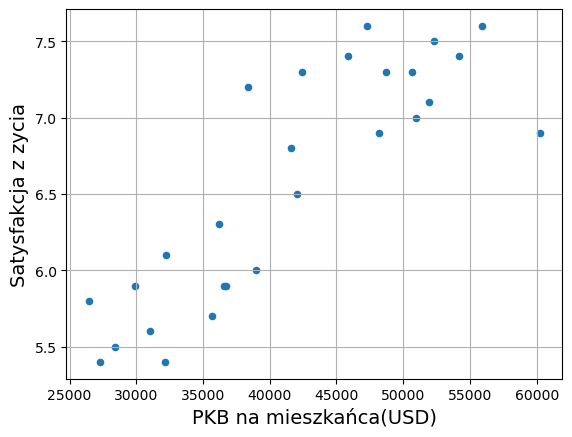

In [19]:
#wizualizujemy dane
lifesat.plot(kind='scatter', grid=True,
             x="PKB na mieszkańca(USD)", y='Satysfakcja z zycia')
plt.show()

In [29]:
#Prygotwoanie zmienne do modelu
X = lifesat[["PKB na mieszkańca(USD)"]]
y = lifesat[["Satysfakcja z zycia"]]

#wybiera model liniowy
model = LinearRegression()

#trenuje model
model.fit(x, y)
#obliczone wspolczynniki modelu
theta_0=model.intercept_[0]
theta_1=model.coef_[0][0]
print(f"theta_0:{theta_0}")
print(f"theta_1:{theta_1}")

theta_0:3.7490494273769093
theta_1:6.778899694341222e-05


<function matplotlib.pyplot.show(close=None, block=None)>

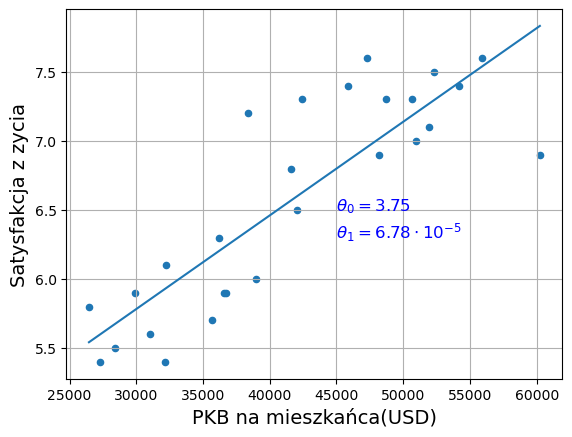

In [30]:
#wizualizujemy dane
lifesat.plot(kind='scatter', grid=True,
             x="PKB na mieszkańca(USD)", y='Satysfakcja z zycia')
plt.plot(X, theta_0+theta_1*X)
plt.text(45000, 6.5, fr"$\theta_0 = {theta_0.round(2)}$",
color="blue")
plt.text(45000, 6.3, fr"$\theta_1 = {theta_1 * 1e5:.2f}\cdot 10^{{-5}}$",
color="blue")
plt.show

In [33]:
cyprus_gdp_per_capita_2020 = (
    gdp_per_capita_2020[gdp_per_capita_2020["Entity"]=="Cyprus"][["GDP per capita (USD)"]]
)
cyprus_gdp_per_capita_2020.rename(
    columns={"GDP per capita (USD)":"PKB na mieszkańca(USD)"},
    inplace=True
)
cyprus_gdp_per_capita_2020

,PKB na mieszkańca(USD)
1517,37655.180346


In [34]:
cyprus_predicted_life_satisfaction=model.predict(cyprus_gdp_per_capita_2020)
cyprus_predicted_life_satisfaction

array([[6.30165633]])

In [35]:
#wybiera modl regresji 3 najbliższych sąsiadów
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=3)

#Trenujemy model
model_knn.fit(X, y)

#Uzyskuje przeiwfywania dla Cypru
model_knn.predict(cyprus_gdp_per_capita_2020)
#mozna równiez policzyc srednia arytmetyczną

array([[6.33333333]])

In [37]:
(7.2+5.9+5.9)/3

6.333333333333333